$$\text{ANOVA Analysis}$$

#### What is ANOVA Analysis?
___
> The idea behind the Analysis of Variance (ANOVA) is to divide the variance into the variance between groups, and that within groups, and see if those distributions match the null hypothesis that all groups come from the same distribution (Fig. 8.3). The variables that distinguish the different groups are often called factors or treatments. -*An Introduction to Statistical Learning with Python*

方差分析是一种用来对比超过两个群体均值变异的统计分析方法。其基本思想是将组别之间的变动量与组别内的变动量进行对比，然后观察对比值的分布是否来自于与原假设相同的分布。而用来区分不同组别之间的变量被称为*treatments.*

Note: 进行方差分析的时候，应该确保各个分析组里的样本量相同。This is also called a *balanced ANOVA: a balanced design has an equal number of observations for all possible combinations of factor levels.*

**方差分析与T检验的对比：**
___
方差分析用来对比超过两个群体之间的均值是否具显著差异，而T检验则对比两个群体的均值是否存在显著差异。如果用T检验对比超过两个以上群体之间的均值差异，我们需要进行多从T检验，计算多个P值；但是，方差分析只需要一次计算就可以判读是否需要拒绝原假设。

**方差分析的类型:**
___
方差分析可以根据独立变量的数量不同划分*单因素方差分析和多因素方差分析*。

**单因素方差分析**指只有一个存在多个级别的独立变量将目标变量拆分成多个组别，对比这多个组别的均值变动差异。

**多因素方差分析**指存在多个独立变量将目标变量拆分成多个组别，对比这些组的均值变动差异。例如，将病人按照treatment和天数两个维度进行划分，研究不同群体的病人的血糖水平。这就属于多因素方差分析，而这种双向方差分析不仅测量独立和自变量，还测量两个因素是否相互影响。

**方差分析的假设：**
___
- 每个组别应该服从正态分布
- 每个组别应该具有大约相同的方差
- 样本之间互相独立



#### How ANOVA Analysis Works?
___
*Step 1: 提出假设*

方差分析的原假设和备择假设：

$$H_0:\text{There is no significant difference in means bewteen groups}$$

$$H_1:\text{At least two groups differ statistically from each other}$$

*Step 2: 计算统计量*

在确认了假设后，方差分析将每个组别之间的误差平方和与每个组内的误差平方和进行对比，计算得到F统计值。为了理解该统计量，首先解释以下统计术语：

$$SS_{total} = \frac{1}{DF}\sum (y_i-\bar{y})^2 = \frac{SS}{DF}$$

- $SS_\text{total}$是每个样本与总样本均值之间的差，然后全部相加取平方。该统计量衡量的是总变动量。
- DF=n-1 指总体的自由度，n为样本量。

$$SSB = n_1(\bar{Y_1} - \bar{Y})^2 + n_2(\bar{Y_2} - \bar{Y})^2 + \dots+ n_p(\bar{Y_p} - \bar{Y})^2$$

- SSB是指每个组与总样本均值之间的差值平方和。例如独立变量有3个水平，则SSB等于三个组各自的均值与总体均值相减并取平方，最终三者相加。
- SSB的自由度为$p-1$，p为独立变量的水平数量。

$$SSW = \sum_{j=1}^p\sum_{i=1}^n(Y_{ij}-\bar{Y_j})^2$$

- SSW指组内，每个样本与该组的均值的距离平方和。
- SSW的自由度为n-p

根据上面三个变量，则我们有以下关系：

$$SS_\text{total} = SSB + SSW$$

该等式的意思为：总的变动量为组间变动量与组内变动量之和。接下来定义F统计值：

$$F = \frac{\text{variance between groups}}{\text{variance within groups}}$$

$$F = \frac{MSB}{MSW} = \frac{SSB/(p-1)}{SSW/(n-p)}$$

在原假设下，两个服从正态分布的群体应该有相同的变动量，所以我们期望该比例服从F分布。

*Step 3: 计算p值做决策*

在计算F值后，可以根据F分布算出该F值的P值，从而可以判断是否应该拒绝该原假设。

#### 为什么方差分析在发挥作用？

我们通常会进行实验，将人群划分成treatment & control。当存在多个treatment的时候就存在多个treatment对应的均值。如果我们想确认treatment是否在对目标变量产生影响，就需要比较多个treatment组之间的均值。可以我们完全可以直接通过均值就判断是否存在差异，为什么还需要方差分析？

尽管各组的平均值似乎不同，但该差异可能是由于抽样误差引起，而不是独立变量对因变量的影响所致。如果是由于抽样错误，则组均值之间的差异毫无意义。方差分析有助于弄清楚平均值的差异在统计学上是否显著。

方差分析还间接揭示了独立变量是否影响因变量。例如，在分析药物对血糖水平的影响实验中，假设方差分析发现群均值在统计学上不显著，则均值之间的差异仅是由于采样误差造成的。我们可以根据该结果判断药物的类型（独立变量）并不是影响血糖水平的重要因素。

#### One-Way ANOVA Analysis

如果仅仅只有一个存在多个水平的独立变量，我们想要确认多个level的目标变量间是否存在显著差异，则应该使用单因素方差分析。

接下来用实际的数据来演示单因素方差分析。假设现在某个公司尝试了许多具有不同类型的营销策略，想要确认是否营销策略的类型影响了销量。现在需要某个人使用统计分析的方法来帮助确认。

提出假设：

$$H_0:\text{每个市场策略之间的销量不存在显著差异}$$

$$H_1:\text{至少两种市场策略之间的销量存在显著差异}$$

为了更加清晰直接地观察不同市场策略的差异，我们来绘制一个箱型图：

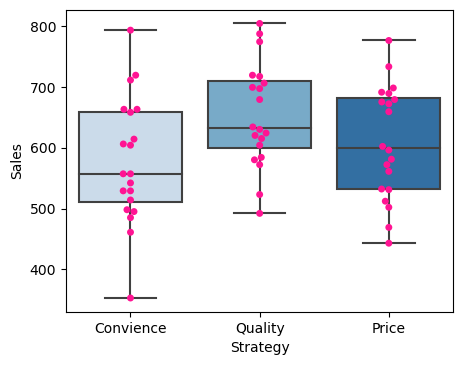

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

data = pd.read_csv("/Users/ray/Desktop/Simon/GSM/core R/class2/data for lecture 2/Anova dataset.csv")

plt,ax = plt.subplots(1,1,figsize=(5,4),dpi=100)
sns.boxplot(x=data["Strategy"],y=data["Sales"],ax=ax,palette="Blues")
sns.swarmplot(x=data["Strategy"],y=data["Sales"],ax=ax,color="deeppink")
plt.show()

根据上图，很容易发现Convenience和Quality Strategy之间存在较大的差异：两者间的均值差异大，并且变动量也存在较大差异。现在我们需要为可视化得到的洞察提供统计证据。

In [7]:
from scipy import stats

convenience = data.query("Strategy == 'Convience'").Sales
quality = data.query("Strategy == 'Quality'").Sales
price = data.query("Strategy == 'Price'").Sales

fstat,pval = stats.stats.f_oneway(convenience,quality,price)
alpha = 0.05
if pval<alpha:
    print("At least two groups differ from each other statistically")
else:
    print("There is no significant difference between groups")

At least two groups differ from each other statistically


根据检验结果，我们仅仅只是确认了存在两个群体之间存在显著差异。但是并不知道具体是哪两个群体。所以我们需要利用**Tukey's Test**。

In [15]:
from bioinfokit.analys import stat

res = stat()
res.tukey_hsd(data,res_var = "Sales",xfac_var='Strategy',anova_model="Sales~C(Strategy)")
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Convience,Quality,75.45,3.682965,147.217035,3.577789,0.037241
1,Convience,Price,31.10,-40.667035,102.867035,1.474742,0.550546
2,Quality,Price,44.35,-27.417035,116.117035,2.103048,0.305127


分析发现，Convenience和Quality之间存在显著差异。

##### Tukey's Test

> Tukey’s test, sometimes also referred to as the Tukey Honest Significant Difference test (HSD) method, controls for the Type I error rate across multiple comparisons and is generally considered an acceptable technique. It is based on a statistic that we have not come across yet, the studentized range, which is commonly represented by the variable q. The studentized range computed from a list of numbers x1; : : : ; xn is given by

$$q_n = \frac{max\{x_1,\dots,x_n\} - min\{x_1,\dots,x_n\}}{s}$$

- s is the sample deviation
- q_n is the test statistic

Tukey's Test可以被用来做事后比较分析来确认哪两个群体之间存在显著差异，如果我们拒绝了“所有群体的均值相等”的假设。

#### Two-Way ANOVA

与单因素反差分析不同，多因素方差分析指两个存在多个水平的独立变量影响目标变量。这个时候我们不仅仅衡量具体哪一个变量是显著的，还会测试变量之间的互动性。

In [28]:
import pandas as pd
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm


data = pd.read_csv("/Users/ray/Downloads/statsintro_python-master/Tests/altman_12_6.txt",
                  sep=",",
                  header=None)
data.columns =["hs","fetus","observer"] 

# Determine the ANOVA with interaction
formula = 'hs ~ C(fetus) + C(observer) + C(fetus):C(observer)' 
lm = ols(formula, data).fit()
anovaResults = anova_lm(lm)
print(anovaResults)

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


不同的fetus